## Gold data analysis

Based on the data for the refractive index for gold obtained from [Johnson and Christy, 1972](https://journals.aps.org/prb/pdf/10.1103/PhysRevB.6.4370) we perform the same analysis done for the silver case.

* Data interpolation decision
* Experimental data analysis 

In [1]:
import numpy 
%matplotlib notebook

In [2]:
from matplotlib import rcParams
rcParams['font.family'] = 'serif'
rcParams['font.size'] = 16

In [3]:
from data_analysis_helper import plot_refrac , linear_interp, spline, spline_eval, plot_interpolation

In [4]:
lambda_g , n_g , k_g = numpy.loadtxt('gold_silver_water_raw-data/gold_JC72_nm.txt', unpack=True)

### Plot raw data

<IPython.core.display.Javascript object>


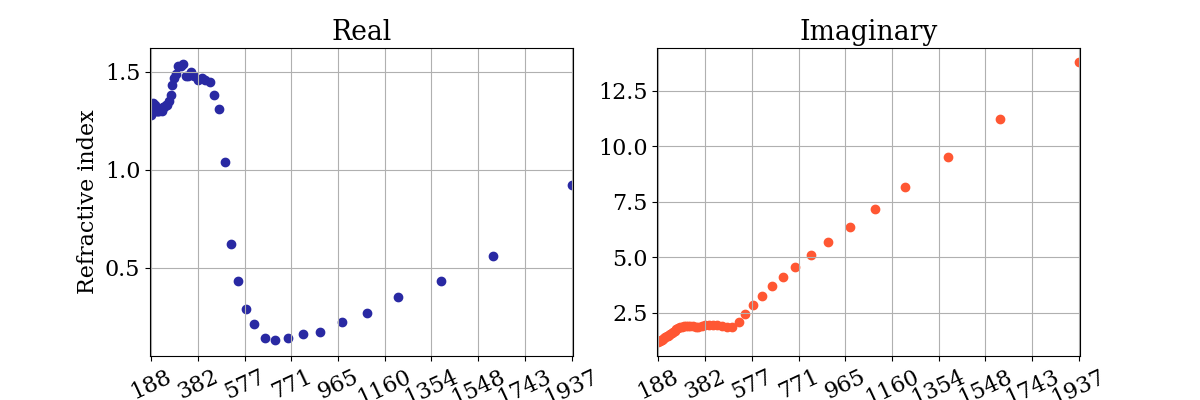

In [5]:
plot_refrac(lambda_g, n_g, k_g)

In [6]:
#linear interpolation
gold_real_linear , gold_imag_linear = linear_interp(lambda_g, n_g, k_g)

#get spline 
gold_real_tuple, gold_imag_tuple = spline(lambda_g, n_g, k_g)

#spline evaluation
lambda_x = numpy.linspace(min(lambda_g), max(lambda_g), num=500, endpoint=True)
gold_real_spline, gold_imag_spline = spline_eval(lambda_x, gold_real_tuple, gold_imag_tuple)

In [7]:
#Need this for convergence test input data. 
ref_gold_520 = gold_real_linear(520) + 1j * gold_imag_linear(520)
diel_gold_520 = ref_gold_520 * ref_gold_520

In [8]:
diel_gold_520

(-3.8874936460215972+2.6344121588317515j)

<IPython.core.display.Javascript object>


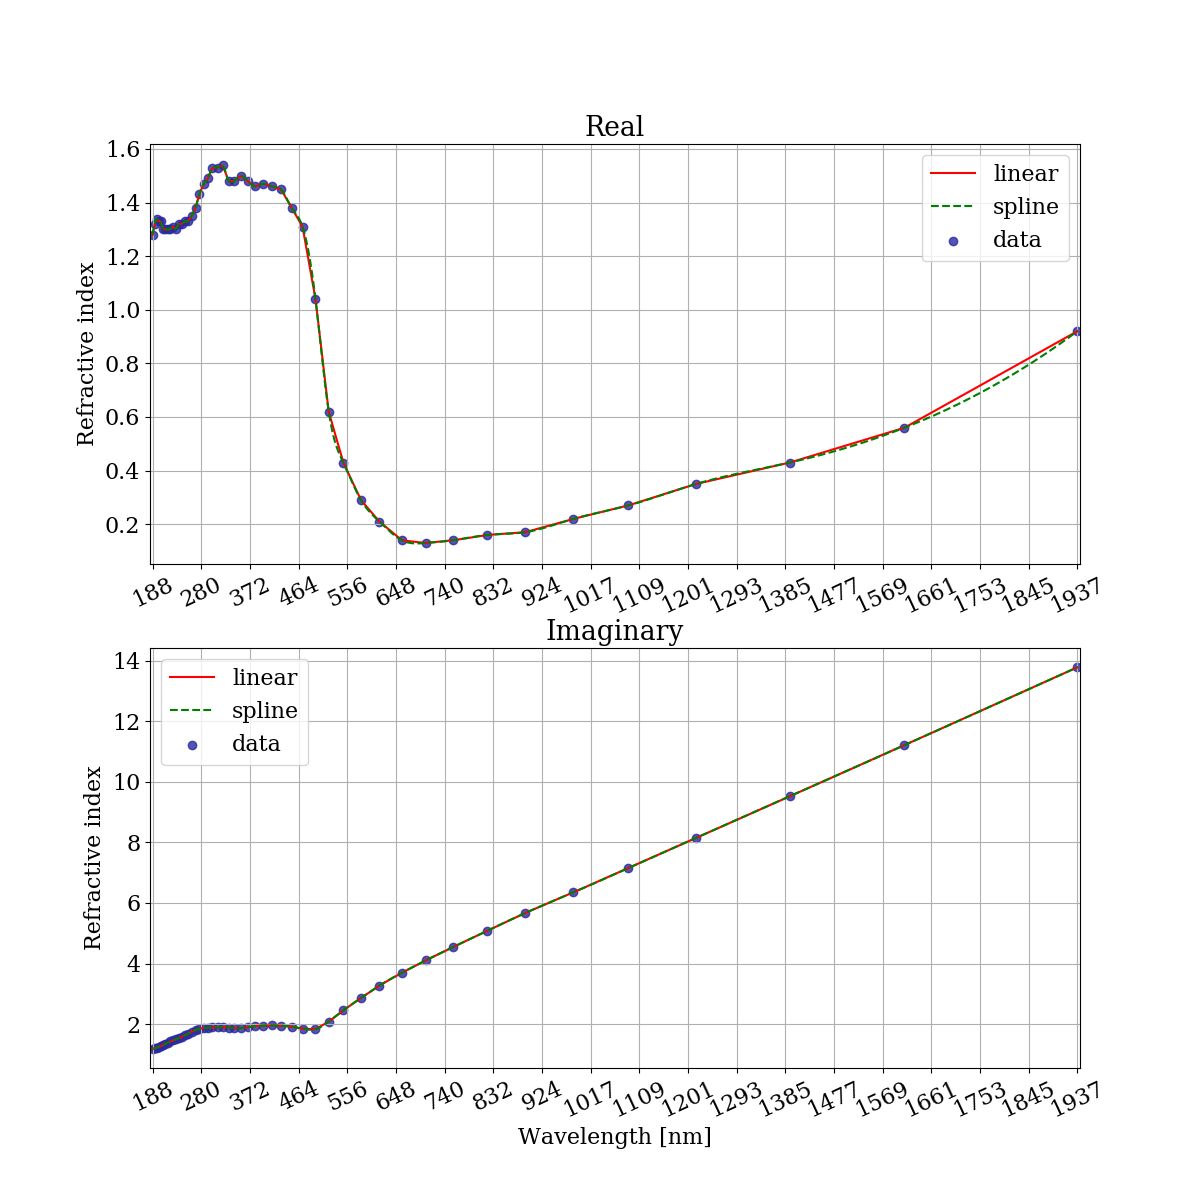

In [9]:
plot_interpolation(lambda_g, n_g, k_g, lambda_x, gold_real_linear, 
                   gold_imag_linear, gold_real_spline, gold_imag_spline)


### Plot difference between linear and spline

Let's plot the difference between each interpolation and compare this difference with the experimental errors reported in the paper.

In [10]:
gold_diff_real = abs(gold_real_linear(lambda_x) - gold_real_spline) 
gold_diff_imag =  abs(gold_imag_linear(lambda_x) - gold_imag_spline)


<IPython.core.display.Javascript object>


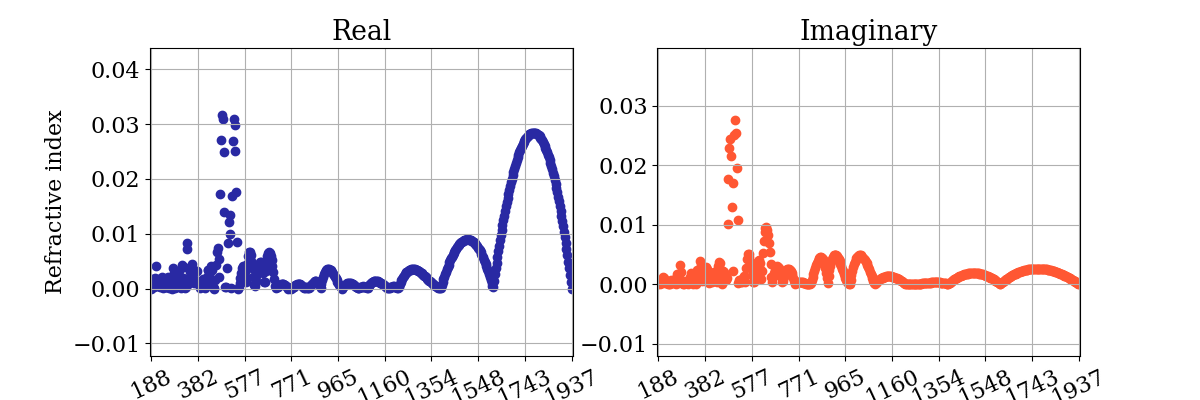

In [11]:
plot_refrac(lambda_x, gold_diff_real, gold_diff_imag)

real part same order of magnitud than the experimental error, then linear fine. 
imag part the difference is an order of magnitud bigger than the experimental error. Well most of the points are in that range. 